# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import csv
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import random
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'



In [4]:
#url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    city=city.replace(' ', '%20')
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



658

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#create an empty list to store data (columns)
names = []
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
record=0

In [7]:
#Perform a weather check on each city using a series of succesive API calls
#start with weathermap API call

print(f"Begining Data Retrieval")
print(f"------------------------------")

#loop through the city from the cities list
for city in cities:
    try:
        query_url = f"{url}appid={api_key}&units={units}&q={city}"
        response = req.get(query_url).json()
        names.append(response["name"])
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city}")
        print(f"{url}appid={api_key}&units={units}&q={city}")
        time.sleep(random.choice([0,.2,.3,.5,1,1.5,2]))
        #Increase counter by 1
        record = record + 1
    
    #if not record is found skip to next call
    except:
        if city not in cities:
            print("City not found. Skipping...")
            continue

Begining Data Retrieval
------------------------------
Processing Record 0 | khor
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=khor
Processing Record 1 | nicoya
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=nicoya
Processing Record 2 | westport
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=westport
Processing Record 3 | praia%20da%20vitoria
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=praia%20da%20vitoria
Processing Record 4 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=chokurdakh
Processing Record 5 | neyvo-shaytanskiy
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=neyvo-shaytanskiy
Processing Record 6 | bambous%20virieux
http://api.op

Processing Record 57 | ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=ilulissat
Processing Record 58 | saldanha
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=saldanha
Processing Record 59 | gorontalo
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=gorontalo
Processing Record 60 | port%20blair
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=port%20blair
Processing Record 61 | ordzhonikidze
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=ordzhonikidze
Processing Record 62 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=kapaa
Processing Record 63 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3

Processing Record 113 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=lavrentiya
Processing Record 114 | new%20norfolk
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=new%20norfolk
Processing Record 115 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=georgetown
Processing Record 116 | port%20lincoln
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=port%20lincoln
Processing Record 117 | clyde%20river
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=clyde%20river
Processing Record 118 | lingao
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=lingao
Processing Record 119 | kovdor
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2

Processing Record 169 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=severo-kurilsk
Processing Record 170 | oranjemund
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=oranjemund
Processing Record 171 | armizonskoye
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=armizonskoye
Processing Record 172 | petropavlovka
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=petropavlovka
Processing Record 173 | sao%20filipe
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=sao%20filipe
Processing Record 174 | chandur%20bazar
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=chandur%20bazar
Processing Record 175 | luau
http://api.openweathermap.org/data/2.5/weathe

Processing Record 225 | chebsara
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=chebsara
Processing Record 226 | anori
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=anori
Processing Record 227 | rio%20gallegos
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=rio%20gallegos
Processing Record 228 | manggar
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=manggar
Processing Record 229 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=beringovskiy
Processing Record 230 | mount%20isa
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=mount%20isa
Processing Record 231 | aswan
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3

Processing Record 281 | san%20cristobal
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=san%20cristobal
Processing Record 282 | te%20anau
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=te%20anau
Processing Record 283 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=vestmannaeyjar
Processing Record 284 | atasu
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=atasu
Processing Record 285 | turka
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=turka
Processing Record 286 | ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=ambilobe
Processing Record 287 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5

Processing Record 337 | frydlant
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=frydlant
Processing Record 338 | mahon
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=mahon
Processing Record 339 | mantua
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=mantua
Processing Record 340 | victoria
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=victoria
Processing Record 341 | neuquen
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=neuquen
Processing Record 342 | taoudenni
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=taoudenni
Processing Record 343 | vilyuysk
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=vily

Processing Record 393 | moerai
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=moerai
Processing Record 394 | moen
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=moen
Processing Record 395 | yenagoa
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=yenagoa
Processing Record 396 | vanavara
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=vanavara
Processing Record 397 | beloha
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=beloha
Processing Record 398 | yumen
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=yumen
Processing Record 399 | igarka
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=igarka
Processing Re

Processing Record 450 | agadez
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=agadez
Processing Record 451 | vardo
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=vardo
Processing Record 452 | tuskegee
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=tuskegee
Processing Record 453 | yelovo
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=yelovo
Processing Record 454 | vanimo
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=vanimo
Processing Record 455 | maragogi
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=maragogi
Processing Record 456 | peniche
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=peniche
Proce

Processing Record 507 | halifax
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=halifax
Processing Record 508 | derzhavinsk
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=derzhavinsk
Processing Record 509 | warner%20robins
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=warner%20robins
Processing Record 510 | neyshabur
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=neyshabur
Processing Record 511 | vestmanna
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=vestmanna
Processing Record 512 | kidal
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=kidal
Processing Record 513 | wawa
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2

Processing Record 564 | humaita
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=humaita
Processing Record 565 | buraydah
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=buraydah
Processing Record 566 | kamloops
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=kamloops
Processing Record 567 | safranbolu
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=safranbolu
Processing Record 568 | kargasok
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=kargasok
Processing Record 569 | piedras%20negras
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8d06e5b3ea2&units=imperial&q=piedras%20negras
Processing Record 570 | dimitrovgrad
http://api.openweathermap.org/data/2.5/weather?appid=5023482bb2e827d13e82f8

In [8]:
weather_data=pd.DataFrame({
    'City Name':names,
    'Cloudiness':clouds,
    'Country':country,
    'Date':date,
    'Humidity':humidity,
    'Max Temperature':max_temp,
    'Latitude':lat,
    'Longitude':lng,
    'Wind Speed':wind_speed
})

In [9]:
weather_data.head()

,City Name,Cloudiness,Country,Date,Humidity,Max Temperature,Latitude,Longitude,Wind Speed
0,Khor,100,RU,1556971117,29,65.03,47.88,134.96,5.08
1,Nicoya,100,CR,1556969427,90,73.00,10.15,-85.45,2.59
2,Westport,20,IE,1556971091,57,54.00,53.80,-9.52,8.05
3,Praia da Vitoria,40,PT,1556970311,77,66.20,38.73,-27.07,12.53
4,Chokurdakh,45,RU,1556971122,95,23.27,70.62,147.90,6.58


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
export_csv = weather_data.to_csv (r'.\export_dataframe.csv', index = None, header=True)

In [20]:
load_data=pd.read_csv('./export_dataframe.csv')

In [22]:
weather_data=pd.DataFrame(load_data)
weather_data.head()

,City Name,Cloudiness,Country,Date,Humidity,Max Temperature,Latitude,Longitude,Wind Speed
0,Khor,100,RU,1556971117,29,65.03,47.88,134.96,5.08
1,Nicoya,100,CR,1556969427,90,73.00,10.15,-85.45,2.59
2,Westport,20,IE,1556971091,57,54.00,53.80,-9.52,8.05
3,Praia da Vitoria,40,PT,1556970311,77,66.20,38.73,-27.07,12.53
4,Chokurdakh,45,RU,1556971122,95,23.27,70.62,147.90,6.58


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

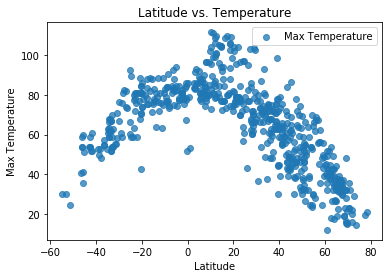

In [27]:
plt.scatter(weather_data['Latitude'],weather_data['Max Temperature'], alpha=.75)
plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs. Temperature')
plt.savefig('lat_vs_temp.png')

#### Latitude vs. Humidity Plot

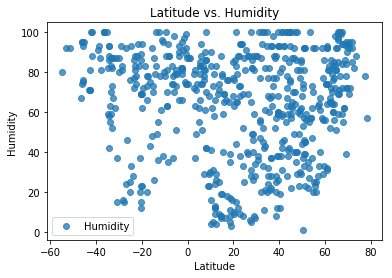

In [28]:
plt.scatter(weather_data['Latitude'],weather_data['Humidity'], alpha=.75)
plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.savefig('lat_vs_humidity.png')

#### Latitude vs. Cloudiness Plot

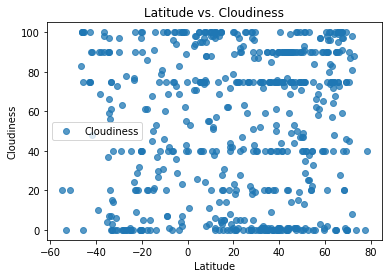

In [29]:
plt.scatter(weather_data['Latitude'],weather_data['Cloudiness'], alpha=.75)
plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.savefig('lat_vs_cloudiness.png')

#### Latitude vs. Wind Speed Plot

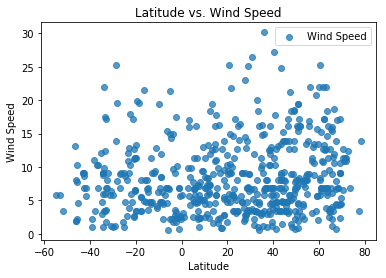

In [30]:
plt.scatter(weather_data['Latitude'],weather_data['Wind Speed'], alpha=.75)
plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.savefig('lat_vs_wind_speed.png')